# Predicting Polish demography (total population, year by year), using fertility rate, imigration data and historic population change.
First off, required imports:


In [13]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
import re
import json


# Data to process
First of all, population over the years.
We will take this from World Development Indicators, as they have very recent data, just from 2024-03-28.



In [14]:


df = pd.read_csv('Countries_population.csv')

polish_population_df = df[df['Country Name'] == 'Poland']
polish_population_df = polish_population_df.drop(columns=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'])
polish_population_df.dropna(axis='columns',inplace=True)
polish_population_df.index=['Population']
polish_population_df=polish_population_df.T
polish_population_df


,Population
1960,29637450.0
1961,29964000.0
1962,30308500.0
1963,30712000.0
1964,31139450.0
...,...
2018,37974750.0
2019,37965475.0
2020,37899070.0
2021,37747124.0


Lets graph those values:

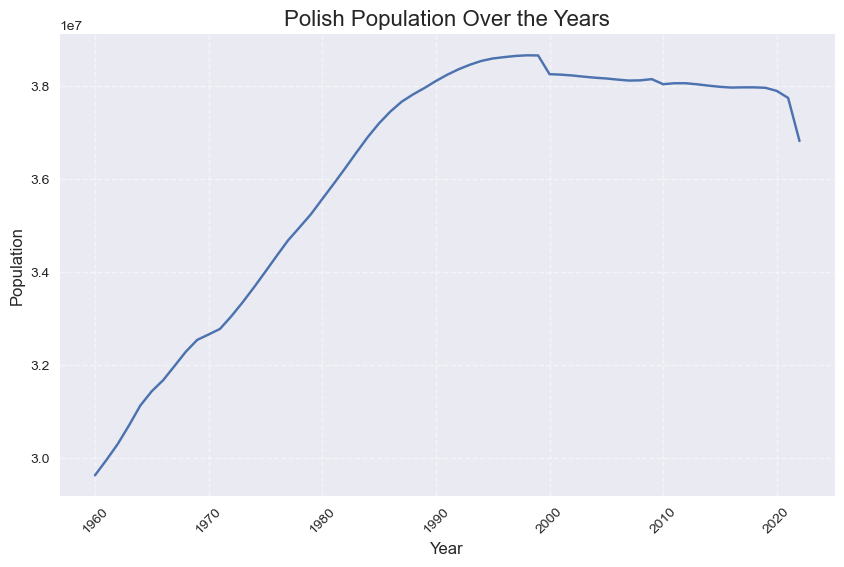

In [15]:


plt.style.use('seaborn-v0_8')

ax = polish_population_df.plot(figsize=(10, 6), legend=False)

ax.set_title('Polish Population Over the Years', fontsize=16)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Population', fontsize=12)

ax.tick_params(axis='x', labelrotation=45)
ax.tick_params(axis='both', labelsize=10)

ax.grid(True, linestyle='--', alpha=0.5)

plt.savefig('polish_population_over_the_years.png')


# International Migrant Stock
Again now, we will use World Bank data. This time, however, a problem arises - data is only colected every 5 years or so, and thus we must interpolate. I have decided to use linear interpolation from pandas.

In [16]:
df = pd.read_csv('Countries_migrant_stock.csv')

polish_migrant_stock = df[df['Country Name'] == 'Poland']
polish_migrant_stock = polish_migrant_stock.drop(columns=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'])
polish_migrant_stock.index=['International Migrant Stock']
#Because of the missing data (it is recorder only around 5 years or so we will interpolate the data
polish_migrant_stock.interpolate(method='linear', axis=1, inplace=True)
polish_population_df.dropna(axis='index',inplace=True)
polish_migrant_stock=polish_migrant_stock.T
polish_migrant_stock.drop(polish_migrant_stock.tail(2).index,inplace=True)
polish_migrant_stock

,International Migrant Stock
1960,2424881.0
1961,2389838.4
1962,2354795.8
1963,2319753.2
1964,2284710.6
...,...
2018,619403.0
2019,619403.0
2020,619403.0
2021,619403.0


Here is how it looks on a graph:

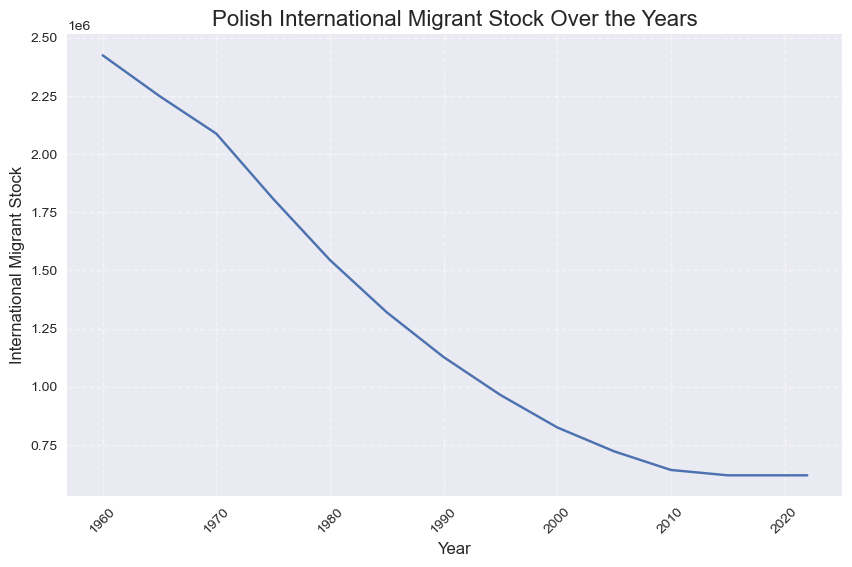

In [17]:


plt.style.use('seaborn-v0_8')

ax = polish_migrant_stock.plot(figsize=(10, 6), legend=False)

ax.set_title('Polish International Migrant Stock Over the Years', fontsize=16)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('International Migrant Stock', fontsize=12)

ax.tick_params(axis='x', labelrotation=45)
ax.tick_params(axis='both', labelsize=10)

ax.grid(True, linestyle='--', alpha=0.5)

plt.savefig('polish_int_migrant_stock_over_the_years.png')


# Fertility rate per woman
Once again, courtesy of World Bank we can find the most important statistic for population change - fertility rate.

In [18]:
df = pd.read_csv('Countries_fertility_rate.csv')

polish_fertility_rate = df[df['Country Name'] == 'Poland']
polish_fertility_rate = polish_fertility_rate.drop(columns=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'])
polish_fertility_rate.index=['Fertility Rate']
#Because of the missing data (it is recorder only around 5 years or so we will interpolate the data
polish_fertility_rate.interpolate(method='linear', axis=1, inplace=True)
polish_fertility_rate.dropna(axis='index',inplace=True)
polish_fertility_rate=polish_fertility_rate.T
polish_fertility_rate.drop(polish_fertility_rate.tail(2).index,inplace=True)
polish_fertility_rate

,Fertility Rate
1960,2.98
1961,2.83
1962,2.72
1963,2.70
1964,2.57
...,...
2018,1.46
2019,1.44
2020,1.39
2021,1.33


Now for the graph:

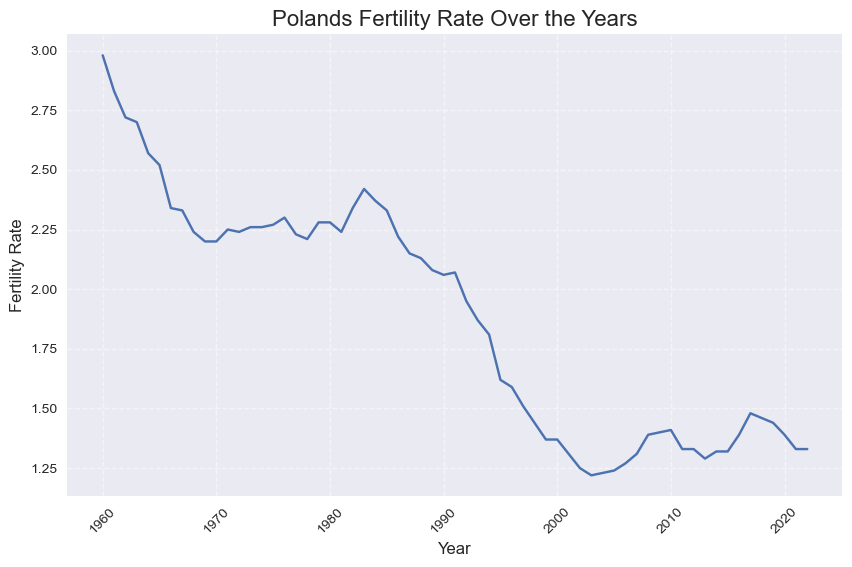

In [19]:


plt.style.use('seaborn-v0_8')

ax = polish_fertility_rate.plot(figsize=(10, 6), legend=False)

ax.set_title('Polands Fertility Rate Over the Years', fontsize=16)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Fertility Rate', fontsize=12)

ax.tick_params(axis='x', labelrotation=45)
ax.tick_params(axis='both', labelsize=10)

ax.grid(True, linestyle='--', alpha=0.5)

plt.savefig('polish_fertility_rate.png')


# Life expentancy at birth
Now for our last metric, life expentancy, at birth, once again sourced from WB:

In [20]:
df = pd.read_csv('Countries_life_expentancy_ab.csv')

polish_life_expentancy = df[df['Country Name'] == 'Poland']
polish_life_expentancy = polish_life_expentancy.drop(columns=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'])
polish_life_expentancy.index=['Life Expentancy at Birth']
#Because of the missing data (it is recorder only around 5 years or so we will interpolate the data
polish_life_expentancy.interpolate(method='linear', axis=1, inplace=True)
polish_life_expentancy.dropna(axis='index',inplace=True)
polish_life_expentancy=polish_life_expentancy.T
polish_life_expentancy.drop(polish_life_expentancy.tail(2).index,inplace=True)
polish_life_expentancy

,Life Expentancy at Birth
1960,67.680488
1961,67.778049
1962,67.426829
1963,68.375610
1964,68.629268
...,...
2018,77.602439
2019,77.904878
2020,76.500000
2021,75.602439


Plotting time:

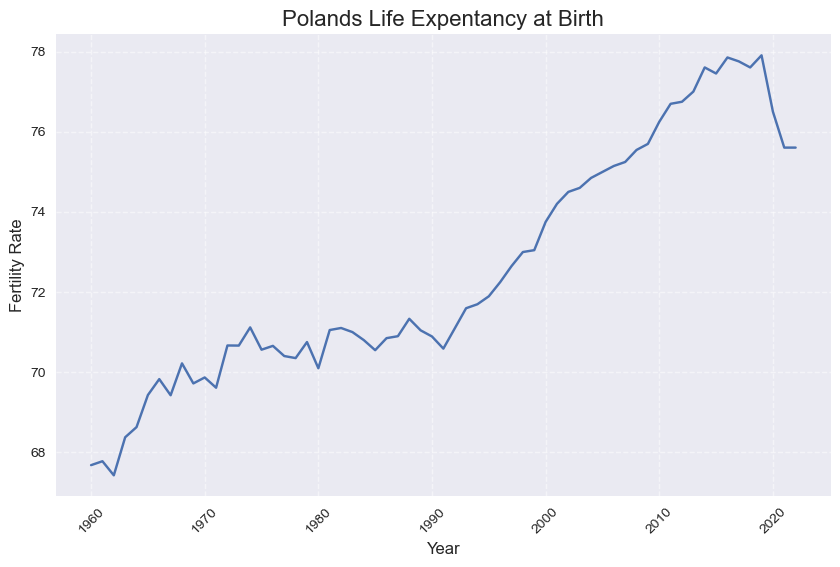

In [21]:
plt.style.use('seaborn-v0_8')

ax = polish_life_expentancy.plot(figsize=(10, 6), legend=False)

ax.set_title('Polands Life Expentancy at Birth', fontsize=16)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Fertility Rate', fontsize=12)

ax.tick_params(axis='x', labelrotation=45)
ax.tick_params(axis='both', labelsize=10)

ax.grid(True, linestyle='--', alpha=0.5)

plt.savefig('polish_life_expentancy.png')

# Urbanization level of Poland
During the research, finding the urbanization level was exceedingly hard. I found the best source at last at [Zintegrowana Platforma Edukacyjna Ministerstwa Edukacji Narodowej](https://zpe.gov.pl/a/zroznicowanie-poziomu-urbanizacji-w-polsce/D19MUchJD), but the only acceptable data was presented in a way of an image.  
I have decided to use [scrape](scrape_image.py) it, and the proceed to use [WebPlot Digitizer](https://automeris.io/WebPlotDigitizer.html) in order to turn it into analyzable form of .csv file.  
It would soon become clear that WebPlot Digitizer did a correct, but not flawless job of turning the image into a file.<br> Instead of treating years as the distinc values that they are, it created them in the form of continouus values.<br>It was nothing a quick python script could not fix however, named [python_fitter](python_fitter.py) with function modify_file that truncates real part of years and unifies them.

In [22]:
from python_fitter import modify_file
from scrape_image import download_image
#Image sraping
download_image("https://static.zpe.gov.pl/portal/f/res-minimized/R1DRpEwOu0kly/4/fYPhB0sYKSWe5DLdlULEQRUZjaP4NGsL.png","urbanizacjawPolsce.png")
#Csv modification, image -> csv was done externally
modify_file("urbanization_analyzed")

Downloaded image successfully - urbanizacjawPolsce.png


# At last we can begin the analsysis of our data

In [30]:
df = pd.read_csv('urbanization_analyzed_modified.csv')
df = df.drop(df.index[:15]) #we are only intrested in data from 1960 onwards

polish_urbanization = df
# Assuming polish_urbanization is your DataFrame and it has a column 'Urbanization'
polish_urbanization['Urbanization'] = polish_urbanization['Urbanization'].interpolate(method='linear')
polish_urbanization
# polish_urbanization.index=['Urbanization']
# polish_urbanization.dropna(axis='index',inplace=True)
# polish_urbanization=polish_urbanization.T
# polish_urbanization

TypeError: pandas.core.internals.base.DataManager.interpolate() got multiple values for keyword argument 'index'

# Lets combine our data into shared Data Frame:

In [44]:
final_data=pd.concat([polish_population_df,polish_migrant_stock,polish_fertility_rate,polish_life_expentancy],axis=1)
final_data

,Population,International Migrant Stock,Fertility Rate,Life Expentancy at Birth
1960,29637450.0,2424881.0,2.98,67.680488
1961,29964000.0,2389838.4,2.83,67.778049
1962,30308500.0,2354795.8,2.72,67.426829
1963,30712000.0,2319753.2,2.70,68.375610
1964,31139450.0,2284710.6,2.57,68.629268
...,...,...,...,...
2018,37974750.0,619403.0,1.46,77.602439
2019,37965475.0,619403.0,1.44,77.904878
2020,37899070.0,619403.0,1.39,76.500000
2021,37747124.0,619403.0,1.33,75.602439


Raport for presented data:

In [ ]:
raport = ProfileReport(final_data, title="Profiling Report")
raport.to_file("final_profiling_report.html")

[As we can see on the report](final_profiling_report.html) there is a very high correlation of our data, which bodes well for our analysis. 
# However a challange arises.
Data frame contains non-normalized values - in one index population values can be as high as 3800000, but fertility rate as low as 1.2. This can, however, be solved using scaler from sckit-learn.
Lets graph it all for better visualisation:

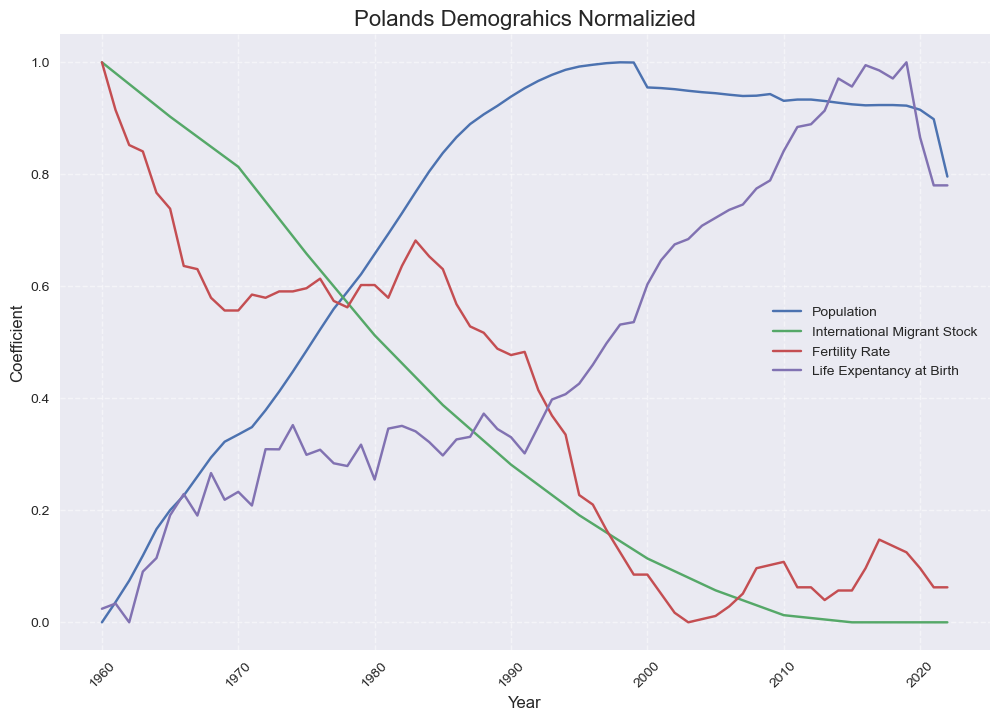

In [51]:
plt.style.use('seaborn-v0_8')
# Data scaling - othgerwise the data would be hard to read!
scaler= MinMaxScaler()
final_data_scaled = pd.DataFrame(scaler.fit_transform(final_data), columns=final_data.columns, index=final_data.index)
ax = final_data_scaled.plot(figsize=(12, 8), legend=True)

ax.set_title('Polands Demograhics Normalizied', fontsize=16)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Coefficient', fontsize=12)

ax.tick_params(axis='x', labelrotation=45)
ax.tick_params(axis='both', labelsize=10)

ax.grid(True, linestyle='--', alpha=0.5)

plt.savefig('poliand_demographics_statistics.png')